In [4]:
import os
import glob
import pandas as pd

In [5]:
csv_path = os.path.join(os.getcwd(), 'ST3 CSV', '*.csv')
csv_list = glob.glob(csv_path)
df = pd.concat(map(pd.read_csv, csv_list), ignore_index=True)


In [6]:
for i in df.columns:
    print(i)

path
source_w
source_h
face_index
obj_score
class_score
x1
y1
x2
y2
used_mask
R_BIN_mask_0
R_BIN_mask_1
R_BIN_mask_2
R_BIN_mask_3
R_BIN_mask_4
R_BIN_mask_5
R_BIN_mask_6
R_BIN_mask_7
R_BIN_mask_8
R_BIN_mask_9
R_BIN_mask_10
R_BIN_mask_11
R_BIN_mask_12
R_BIN_mask_13
R_BIN_mask_14
R_BIN_mask_15
R_BIN_mask_16
R_BIN_mask_17
R_BIN_mask_18
R_BIN_mask_19
R_BIN_mask_20
R_BIN_mask_21
R_BIN_mask_22
R_BIN_mask_23
R_BIN_mask_24
R_BIN_mask_25
G_BIN_mask_0
G_BIN_mask_1
G_BIN_mask_2
G_BIN_mask_3
G_BIN_mask_4
G_BIN_mask_5
G_BIN_mask_6
G_BIN_mask_7
G_BIN_mask_8
G_BIN_mask_9
G_BIN_mask_10
G_BIN_mask_11
G_BIN_mask_12
G_BIN_mask_13
G_BIN_mask_14
G_BIN_mask_15
G_BIN_mask_16
G_BIN_mask_17
G_BIN_mask_18
G_BIN_mask_19
G_BIN_mask_20
G_BIN_mask_21
G_BIN_mask_22
G_BIN_mask_23
G_BIN_mask_24
G_BIN_mask_25
B_BIN_mask_0
B_BIN_mask_1
B_BIN_mask_2
B_BIN_mask_3
B_BIN_mask_4
B_BIN_mask_5
B_BIN_mask_6
B_BIN_mask_7
B_BIN_mask_8
B_BIN_mask_9
B_BIN_mask_10
B_BIN_mask_11
B_BIN_mask_12
B_BIN_mask_13
B_BIN_mask_14
B_BIN_mask_15


In [7]:
# normalize x, y, w, h values
df['x'] = (df['x1'] + df['x2'] + 1) / 2 / 416
df['y'] = (df['y1'] + df['y2'] + 1) / 2 / 416
df['w'] = (df['x2'] - df['x1'] + 1) / 416
df['h'] = (df['y2'] - df['y1'] + 1) / 416

In [11]:
#check for outliers
df[['e_face_yn', 'e_face_mp', 'e_face_yf', 'e_bbox_yn', 'e_bbox_mp', 'e_bbox_yf', 'e_lbbox_yn', 'e_lbbox_mp', 'e_lbbox_yf', 'e_bg_yn', 'e_bg_mp', 'e_bg_yf']].describe()

,e_face_yn,e_face_mp,e_face_yf,e_bbox_yn,e_bbox_mp,e_bbox_yf,e_lbbox_yn,e_lbbox_mp,e_lbbox_yf,e_bg_yn,e_bg_mp,e_bg_yf
count,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000
mean,0.129880,0.232558,0.218467,0.127623,0.226451,0.205428,0.134472,0.185302,0.176467,3.405064,3.353626,3.478902
std,0.051264,0.117544,0.081865,0.048293,0.111712,0.066699,0.080009,0.056161,0.045706,0.562637,0.698777,0.262395
min,0.000000,0.000000,0.005000,0.000000,0.000000,0.005000,0.000000,0.000000,0.005000,0.000000,0.000000,0.005000
25%,0.105000,0.175000,0.165000,0.105000,0.170000,0.165000,0.105000,0.165000,0.150000,3.500000,3.500000,3.500000
50%,0.130000,0.210000,0.210000,0.130000,0.210000,0.205000,0.125000,0.190000,0.175000,3.500000,3.500000,3.500000
75%,0.150000,0.265000,0.260000,0.150000,0.255000,0.245000,0.150000,0.220000,0.200000,3.500000,3.500000,3.500000
max,0.895000,0.985000,0.935000,0.970000,1.000000,0.865000,0.985000,0.485000,0.600000,3.500000,3.500000,3.500000


array([[<AxesSubplot:title={'center':'e_face_yn'}>,
        <AxesSubplot:title={'center':'e_face_mp'}>,
        <AxesSubplot:title={'center':'e_face_yf'}>],
       [<AxesSubplot:title={'center':'e_bbox_yn'}>,
        <AxesSubplot:title={'center':'e_bbox_mp'}>,
        <AxesSubplot:title={'center':'e_bbox_yf'}>],
       [<AxesSubplot:title={'center':'e_lbbox_yn'}>,
        <AxesSubplot:title={'center':'e_lbbox_mp'}>,
        <AxesSubplot:title={'center':'e_lbbox_yf'}>],
       [<AxesSubplot:title={'center':'e_bg_yn'}>,
        <AxesSubplot:title={'center':'e_bg_mp'}>,
        <AxesSubplot:title={'center':'e_bg_yf'}>]], dtype=object)

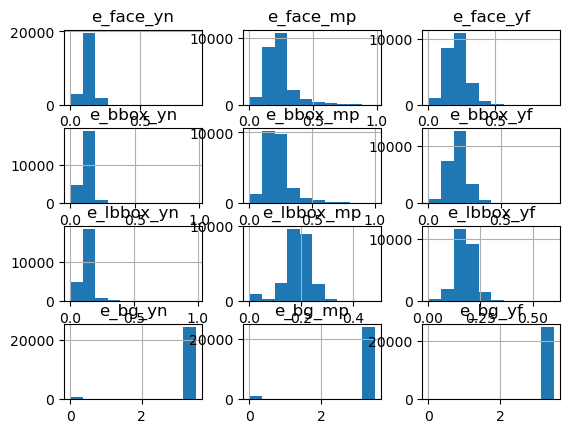

In [12]:
df[['e_face_yn', 'e_face_mp', 'e_face_yf', 'e_bbox_yn', 'e_bbox_mp', 'e_bbox_yf', 'e_lbbox_yn', 'e_lbbox_mp', 'e_lbbox_yf', 'e_bg_yn', 'e_bg_mp', 'e_bg_yf']].hist()

In [10]:
#drop outliers
outlier_col = ['e_face_yn', 'e_face_mp', 'e_face_yf', 'e_bbox_yn', 'e_bbox_mp', 'e_bbox_yf', 'e_lbbox_yn', 'e_lbbox_mp', 'e_lbbox_yf']
for col in outlier_col:
    df = df[df[col] < 3.0]

In [13]:
#save as csv
df.to_csv('ths-st3 compiled dataset.csv', index=False)